In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [66]:
sigma1 = 1/500
A = np.random.rand(500,2000)*sigma1
sigma2 = 1/50
x_star = np.random.rand(2000,1)*sigma2
# it has to be 50-sparse
mask1 = np.random.randint(0,2000,50)
x_star[mask1,:] = 0
sigma3 = 0.5/500
e = np.random.rand(500,1)*sigma3
y = A@x_star + e
lambda_reg = np.arange(0,5,0.05)
mse_list = []

In [56]:
x_star.shape
e.shape
y.shape

(500, 1)

In [57]:
for lmb in lambda_reg:
    x_hat = (A.T@A + lmb*np.eye(2000))@A.T@y
    mse = np.mean((x_star-x_hat)**2)
    mse_list.append(mse)

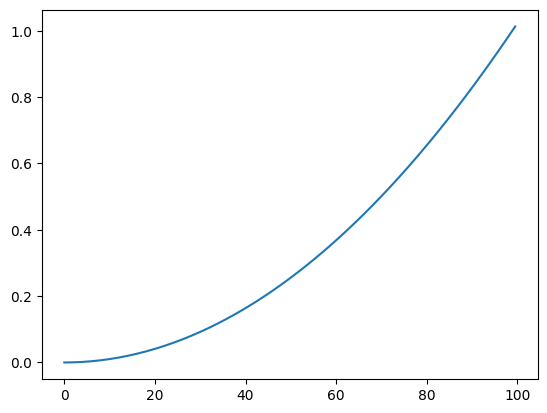

In [58]:
plt.plot(lambda_reg,mse_list)

In [59]:
#derivative of function f
def delta_f(x):
    return A.T@(A@x-y)

#Soft Thresholding Operator
def STO(x,lamda,alpha):
    c=lamda*alpha
    x[(x>=-c)&(x<=c)]=0
    x[x<-c]+=c
    x[x>c]-=c
    return x

In [67]:
max_iterations=100
alpha=0.0001 #step size
# lamda=50     #lambda
g_k=[]
mse_list2 = []

for lmb in lambda_reg:
    #initialize x: x_0=0
    x_k=np.zeros((2000,1))
    for i in tqdm(range(max_iterations)):
        x_k-=alpha*delta_f(x_k) #step update for f(x)
        x_k=STO(x_k,lmb,alpha) #soft thresholding
    mse_list2.append(np.mean((x_star-x_k)**2))

100%|██████████| 100/100 [00:00<00:00, 868.66it/s]


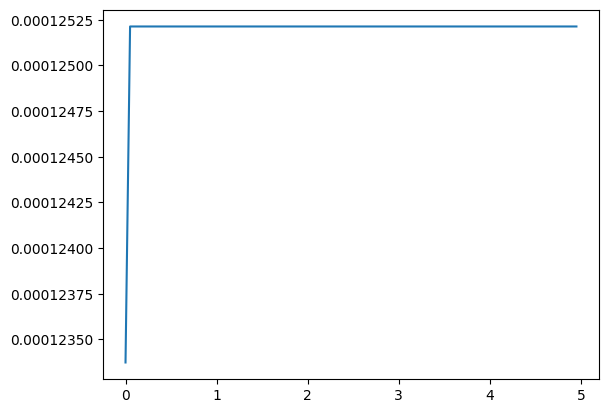

In [68]:
plt.plot(lambda_reg,mse_list2)